In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

##### Import dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/azizpandoyo/UTS-AI/main/UP-5.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/azizpandoyo/UTS-AI/main/UP-6.csv')

##### Read the first 5 rows using `head` method

In [3]:
data.head()

,Formation,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Seno,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,44,0.01,19/06/2010 07.12.15
1,Seno,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,40,0.05,19/06/2010 07.14.23
2,Seno,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,40,0.09,19/06/2010 07.16.43
3,Seno,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,48,0.20,19/06/2010 09.04.13
4,Seno,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,58,0.23,19/06/2010 09.05.52


In [4]:
data2.head()

,FORMATION,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Mio,24.0,18,18.02,25.6,2,152.4,10,62,1363,8.7,8.7,0,0.04,28/07/2010 12.17.20
1,Mio,24.0,19,19.00,35.5,2,152.2,10,57,649,8.7,8.7,0,0.11,28/07/2010 12.21.35
2,Mio,24.0,20,19.50,20.6,2,114.3,8,43,0,8.7,8.7,0,0.17,28/07/2010 12.46.54
3,Mio,24.0,21,19.50,20.1,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31
4,Mio,24.0,22,19.50,19.9,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31


## Exploratory Data Analysis

### Data UP-5

In [5]:
data.describe()

,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr)
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,1456.500000,1456.411924,72.522935,8.744412,824.538387,2959.543246,156.351312,9213.728377,10.852662,10.872496,62.658892,21.953197
std,594.237747,594.199795,32.636414,3.591133,34.861439,581.566385,23.840552,3168.341569,0.250399,0.262644,1.605554,12.030151
min,428.000000,428.010000,3.100000,0.000000,428.800000,547.000000,70.000000,784.000000,10.400000,10.388000,40.000000,0.010000
25%,942.250000,942.177500,49.725000,7.000000,815.200000,2434.500000,146.000000,6946.500000,10.500000,10.556000,62.000000,13.095000
50%,1456.500000,1456.425000,67.200000,9.000000,823.400000,2901.000000,158.000000,9147.500000,11.000000,10.900000,63.000000,21.600000
75%,1970.750000,1970.667500,91.875000,11.000000,844.300000,3443.500000,167.000000,11404.500000,11.000000,11.080000,64.000000,30.435000
max,2485.000000,2484.790000,203.200000,22.000000,1130.500000,3966.000000,199.000000,19822.000000,11.000000,11.080000,65.000000,50.330000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Formation      2058 non-null   object 
 1   TMD (m)        2058 non-null   int64  
 2   TVD (m)        2058 non-null   float64
 3   ROP (m/hr)     2058 non-null   float64
 4   WOB (ton)      2058 non-null   int64  
 5   FR (gpm)       2058 non-null   float64
 6   SPP (psi)      2058 non-null   int64  
 7   RPM (rpm)      2058 non-null   int64  
 8   TQ (lb.ft)     2058 non-null   int64  
 9   MW IN (ppg)    2058 non-null   float64
 10  MW OUT (ppg)   2058 non-null   float64
 11  RETURN (%)     2058 non-null   int64  
 12  BIT TIME (hr)  2058 non-null   float64
 13  DATE TIME      2058 non-null   object 
dtypes: float64(6), int64(6), object(2)
memory usage: 225.2+ KB


In [7]:
# print(data['Formation'].tolist()) # untuk mengetahui nama-nama formasinya pada data UP-5

### Data UP-6

In [8]:
data2.describe()

,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr)
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000
mean,13.040092,1274.000000,1273.917839,84.100398,9.636689,764.088977,3006.333068,140.845603,7737.759650,10.543717,10.567039,36.929168,17.263402
std,2.105961,725.584936,725.552343,42.813343,3.502575,135.322381,1262.556996,33.564465,3199.764775,0.798868,0.778417,6.737379,10.012227
min,12.250000,18.000000,18.020000,2.700000,0.000000,114.300000,8.000000,21.000000,0.000000,8.420000,7.706000,0.000000,0.010000
25%,12.250000,646.000000,646.000000,50.800000,7.000000,766.100000,2362.000000,134.000000,5524.000000,10.577000,10.543000,37.000000,8.530000
50%,12.250000,1274.000000,1273.940000,77.400000,10.000000,796.500000,3317.000000,150.000000,8166.000000,10.919000,10.892000,39.000000,17.160000
75%,12.250000,1902.000000,1901.870000,115.800000,12.000000,828.300000,4009.000000,164.000000,10033.000000,10.977000,11.048000,40.000000,24.150000
max,24.000000,2530.000000,2529.770000,309.100000,21.000000,1410.900000,4416.000000,196.000000,18147.000000,11.208000,11.261000,42.000000,41.260000


In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FORMATION      2513 non-null   object 
 1   BIT SIZE (in)  2513 non-null   float64
 2   TMD (m)        2513 non-null   int64  
 3   TVD (m)        2513 non-null   float64
 4   ROP (m/hr)     2513 non-null   float64
 5   WOB (ton)      2513 non-null   int64  
 6   FR (gpm)       2513 non-null   float64
 7   SPP (psi)      2513 non-null   int64  
 8   RPM (rpm)      2513 non-null   int64  
 9   TQ (lb*ft)     2513 non-null   int64  
 10  MW IN (ppg)    2513 non-null   float64
 11  MW OUT (ppg)   2513 non-null   float64
 12  RETURN (%)     2513 non-null   int64  
 13  BIT TIME (hr)  2513 non-null   float64
 14  DATE TIME      2513 non-null   object 
dtypes: float64(7), int64(6), object(2)
memory usage: 294.6+ KB


In [245]:
# print(data2['FORMATION'].tolist()) # untuk mengetahui nama-nama formasinya pada data UP-6

### Multi-variate data analysis

In [11]:
# Data UP-5
data.corr(method='pearson')

C:\Users\mabdu\AppData\Local\Temp\ipykernel_212772\3168104862.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='pearson')


,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr)
TMD (m),1.000000,1.000000,-0.227054,0.236270,-0.121767,0.948814,0.722908,0.064018,0.765365,0.879116,0.358008,0.994750
TVD (m),1.000000,1.000000,-0.227043,0.236264,-0.121764,0.948812,0.722911,0.064014,0.765362,0.879119,0.358008,0.994746
ROP (m/hr),-0.227054,-0.227043,1.000000,-0.405112,0.232410,-0.103467,-0.022481,-0.040455,0.118103,0.010952,0.243881,-0.241818
WOB (ton),0.236270,0.236264,-0.405112,1.000000,0.139157,0.210405,0.154641,0.396434,-0.128102,-0.003600,0.132256,0.260203
FR (gpm),-0.121767,-0.121764,0.232410,0.139157,1.000000,0.053758,0.082661,0.283229,-0.139047,-0.132879,0.613617,-0.129167
SPP (psi),0.948814,0.948812,-0.103467,0.210405,0.053758,1.000000,0.730816,0.115270,0.772071,0.861910,0.517864,0.942389
RPM (rpm),0.722908,0.722911,-0.022481,0.154641,0.082661,0.730816,1.000000,0.007684,0.524779,0.618517,0.474464,0.723161
TQ (lb.ft),0.064018,0.064014,-0.040455,0.396434,0.283229,0.115270,0.007684,1.000000,-0.116015,-0.069147,0.216287,0.059622
MW IN (ppg),0.765365,0.765362,0.118103,-0.128102,-0.139047,0.772071,0.524779,-0.116015,1.000000,0.953472,0.391870,0.749850
MW OUT (ppg),0.879116,0.879119,0.010952,-0.003600,-0.132879,0.861910,0.618517,-0.069147,0.953472,1.000000,0.420085,0.860783


In [12]:
# Data UP-6
data.corr(method='pearson')

C:\Users\mabdu\AppData\Local\Temp\ipykernel_212772\2106514302.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='pearson')


,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr)
TMD (m),1.000000,1.000000,-0.227054,0.236270,-0.121767,0.948814,0.722908,0.064018,0.765365,0.879116,0.358008,0.994750
TVD (m),1.000000,1.000000,-0.227043,0.236264,-0.121764,0.948812,0.722911,0.064014,0.765362,0.879119,0.358008,0.994746
ROP (m/hr),-0.227054,-0.227043,1.000000,-0.405112,0.232410,-0.103467,-0.022481,-0.040455,0.118103,0.010952,0.243881,-0.241818
WOB (ton),0.236270,0.236264,-0.405112,1.000000,0.139157,0.210405,0.154641,0.396434,-0.128102,-0.003600,0.132256,0.260203
FR (gpm),-0.121767,-0.121764,0.232410,0.139157,1.000000,0.053758,0.082661,0.283229,-0.139047,-0.132879,0.613617,-0.129167
SPP (psi),0.948814,0.948812,-0.103467,0.210405,0.053758,1.000000,0.730816,0.115270,0.772071,0.861910,0.517864,0.942389
RPM (rpm),0.722908,0.722911,-0.022481,0.154641,0.082661,0.730816,1.000000,0.007684,0.524779,0.618517,0.474464,0.723161
TQ (lb.ft),0.064018,0.064014,-0.040455,0.396434,0.283229,0.115270,0.007684,1.000000,-0.116015,-0.069147,0.216287,0.059622
MW IN (ppg),0.765365,0.765362,0.118103,-0.128102,-0.139047,0.772071,0.524779,-0.116015,1.000000,0.953472,0.391870,0.749850
MW OUT (ppg),0.879116,0.879119,0.010952,-0.003600,-0.132879,0.861910,0.618517,-0.069147,0.953472,1.000000,0.420085,0.860783


# **Pemodelan Prediksi Rate of Penetration**

## Data Preprocessing

### Data Encoding 

In [246]:
# Proses ini dilakukan agar dapat memisahkan data numerik dan kategorial
# Pemisahan ini akan membantu proses encoding data kategorial

# Data UP-5
num_data = data._get_numeric_data()
cat_data = data.drop(num_data, axis=1)

# Data UP-6
num_data2 = data2._get_numeric_data()
cat_data2 = data2.drop(num_data2, axis=1)

* Proses encoding menggunakan one hot encoding karena encoding jenis ini mengubah data kategorikal integer menjadi boolean (true false) dimana setiap data kategori unik akan di-expand menjadi kolom atau parameter baru. Berbeda halnya dengan label encoding karena mengubah data kategorikal yang bersifat string menjadi numeric agar lebih mudah dimengerti oleh sistem. Namun proses label encoding akan menimbulkan masalah baru, terlebih jika kita memiliki lebih dari dua kategori dalam satu kolom atau parameter.

In [252]:
# Data UP-5

oh_enc = preprocessing.OneHotEncoder()
ohe_out = pd.DataFrame(oh_enc.fit_transform(cat_data[["Formation"]]).toarray())

# Melakukan penamaan pada kolom sesuai nama formasinya
ohe_out.columns = ['Seno', 'Turo', 'Ceno', 'Albi', 'Apti', 'Barre', 'Neo', 'Malcolm', 'Eren Shale', 'Mikasa Anhydrite']

# Menggabungkan semua datanya dengan concat pandas
input_matrix = pd.concat([num_data, ohe_out], axis=1)
input_matrix.head()

,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),...,Seno,Turo,Ceno,Albi,Apti,Barre,Neo,Malcolm,Eren Shale,Mikasa Anhydrite
0,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [251]:
# Data UP-6

oh_enc2 = preprocessing.OneHotEncoder()
ohe_out2 = pd.DataFrame(oh_enc.fit_transform(cat_data2[["FORMATION"]]).toarray())

# Melakukan penamaan pada kolom sesuai nama formasinya
ohe_out2.columns = ['Mio', 'Seno Carbonate', 'Seno Anhydratic', 'Seno Salt', 'Ceno', 'Albi', 'Apti', 'Barre', 'Neo', 'Malcolm', 'Eren Shale', 'Mikasa Ahydrite']

# Menggabungkan semua datanya dengan concat pandas
input_matrix2 = pd.concat([num_data2, ohe_out2], axis=1)
input_matrix2.head()

,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),...,Seno Anhydratic,Seno Salt,Ceno,Albi,Apti,Barre,Neo,Malcolm,Eren Shale,Mikasa Ahydrite
0,24.0,18,18.02,25.6,2,152.4,10,62,1363,8.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,24.0,19,19.00,35.5,2,152.2,10,57,649,8.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,24.0,20,19.50,20.6,2,114.3,8,43,0,8.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,24.0,21,19.50,20.1,2,152.3,10,58,0,8.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24.0,22,19.50,19.9,2,152.3,10,58,0,8.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Creating feature matrix and output matrix

Here, we will create two matrices:
* `X` data frame consisting feature (independent variable) columns
* `y` data frame consist of dependent variable (last column in `data` data frame) 

##### DATA UP-5

In [62]:
data_not_use = ['TMD (m)', 'TVD (m)', 'ROP (m/hr)','SPP (psi)', 'TQ (lb.ft)', 'MW IN (ppg)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)']
X = input_matrix.drop(data_not_use, axis=1) # input/feature matrix
y = input_matrix['ROP (m/hr)'] # output matrix

In [63]:
X.head()

,WOB (ton),FR (gpm),RPM (rpm),Seno,Turo,Ceno,Albi,Apti,Barre,Neo,Malcolm,Eren Shale,Mikasa Anhydrite
0,3,514.3,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,428.8,79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,442.7,79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,604.9,82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10,782.1,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


##### DATA UP-6

In [106]:
data_not_use2 = ['BIT SIZE (in)', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)','SPP (psi)', 'TQ (lb*ft)', 'MW IN (ppg)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)']
X2 = input_matrix2.drop(data_not_use2, axis=1) # input/feature matrix
y2 = input_matrix2['ROP (m/hr)'] # output matrix

In [107]:
X2.head()

,WOB (ton),FR (gpm),RPM (rpm),Mio,Seno Carbonate,Seno Anhydratic,Seno Salt,Ceno,Albi,Apti,Barre,Neo,Malcolm,Eren Shale,Mikasa Ahydrite
0,2,152.4,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,152.2,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,114.3,43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,152.3,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2,152.3,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Splitting the dataset into the Training set and Test set

Here we can use `train_test_split` method of `model_selection` module from `sklearn` library. At this step, we will have 4 (four) new dataframe:
* `X_train`
* `X_test`
* `y_train`
* `y_test`

Given that the `test_size` is 0.2 (or 20% of our original dataset will be used as test set)

In [108]:
from sklearn.model_selection import train_test_split

# Data UP-5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Data UP-6
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=1)

In [109]:
X_train.head()

,WOB (ton),FR (gpm),RPM (rpm),Seno,Turo,Ceno,Albi,Apti,Barre,Neo,Malcolm,Eren Shale,Mikasa Anhydrite
563,1,859.9,151,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17,6,812.9,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
248,2,820.8,142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1739,10,823.2,174,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1412,10,845.1,172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [110]:
X_test.head()

,WOB (ton),FR (gpm),RPM (rpm),Seno,Turo,Ceno,Albi,Apti,Barre,Neo,Malcolm,Eren Shale,Mikasa Anhydrite
1178,8,777.4,149,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1706,9,817.1,182,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
920,4,819.6,159,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,13,824.3,118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1011,4,772.3,155,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
X2_train.head()

,WOB (ton),FR (gpm),RPM (rpm),Mio,Seno Carbonate,Seno Anhydratic,Seno Salt,Ceno,Albi,Apti,Barre,Neo,Malcolm,Eren Shale,Mikasa Ahydrite
1481,8,850.8,162,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1087,4,828.6,138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
985,7,770.7,166,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1217,7,813.2,160,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,7,372.1,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [112]:
X2_test.head()

,WOB (ton),FR (gpm),RPM (rpm),Mio,Seno Carbonate,Seno Anhydratic,Seno Salt,Ceno,Albi,Apti,Barre,Neo,Malcolm,Eren Shale,Mikasa Ahydrite
983,10,770.5,146,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1402,4,843.6,135,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1972,10,804.3,153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1804,13,770.1,142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1517,10,837.4,143,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Scaling

Feature scaling can be performed using `preprocessing` module from `sklearn`. In general, there are two types of feature scaling:
* Standardization (using `StandardScaler` class)
* Normalization (using `MinMaxScaler` class) 

Here, we will use standardization feature scaling using `StandardScaler` class described as below
* `sc` is an instance of `StandardScaler` class. Also known as "scaler"
* `fit` method will determine the mean and standard deviation of `X_train` data
* a new Numpy array of `X_train_scaled` will be created by transforming `X_train` data frame based on scaler `sc` using `transform` method 

In [113]:
from sklearn.preprocessing import StandardScaler

# for Data UP-5
sc = StandardScaler()
# let's allow sc to see our X_train data, and determine mean and sd during learning
sc.fit(X_train) # for Data UP-5

# let's use the mean and sd learned by sc to transform our data
X_train_scaled = sc.transform(X_train) # for Data UP-5

In [114]:
# for Data UP-6
sc2 = StandardScaler()
# let's allow sc to see our X_train data, and determine mean and sd during learning
sc2.fit(X2_train) # for Data UP-6

# let's use the mean and sd learned by sc to transform our data
X2_train_scaled = sc2.transform(X2_train) # for Data UP-6

In [115]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=[X_train]) # for Data UP-5
X2_train_scaled = pd.DataFrame(X2_train_scaled, columns=[X2_train]) # for Data UP-6

In [116]:
X_train_scaled.head()

,WOB (ton),FR (gpm),RPM (rpm),Seno,Turo,Ceno,Albi,Apti,Barre,Neo,Malcolm,Eren Shale,Mikasa Anhydrite
0,-2.145747,0.992101,-0.231971,-0.344915,-0.13155,-0.489344,2.995957,-0.376125,-0.326996,-0.153727,-0.389685,-0.447866,-0.20599
1,-0.764912,-0.333419,-2.431223,-0.344915,-0.13155,-0.489344,-0.333783,-0.376125,-0.326996,-0.153727,-0.389685,2.232813,-0.20599
2,-1.869580,-0.110619,-0.612611,-0.344915,-0.13155,-0.489344,-0.333783,-0.376125,-0.326996,-0.153727,-0.389685,2.232813,-0.20599
3,0.339756,-0.042933,0.740775,-0.344915,-0.13155,-0.489344,-0.333783,-0.376125,3.058137,-0.153727,-0.389685,-0.447866,-0.20599
4,0.339756,0.574703,0.656189,-0.344915,-0.13155,-0.489344,-0.333783,-0.376125,-0.326996,-0.153727,2.566175,-0.447866,-0.20599


In [117]:
X2_train_scaled.head()

,WOB (ton),FR (gpm),RPM (rpm),Mio,Seno Carbonate,Seno Anhydratic,Seno Salt,Ceno,Albi,Apti,Barre,Neo,Malcolm,Eren Shale,Mikasa Ahydrite
0,-0.460287,0.638740,0.635982,-0.319333,-0.116686,2.306676,-0.355036,-0.329636,-0.300036,-0.142494,-0.295083,-0.346088,-0.332411,-0.287038,-0.254202
1,-1.592347,0.478424,-0.064501,3.131525,-0.116686,-0.433524,-0.355036,-0.329636,-0.300036,-0.142494,-0.295083,-0.346088,-0.332411,-0.287038,-0.254202
2,-0.743302,0.060303,0.752729,-0.319333,-0.116686,-0.433524,2.816617,-0.329636,-0.300036,-0.142494,-0.295083,-0.346088,-0.332411,-0.287038,-0.254202
3,-0.743302,0.367214,0.577608,3.131525,-0.116686,-0.433524,-0.355036,-0.329636,-0.300036,-0.142494,-0.295083,-0.346088,-0.332411,-0.287038,-0.254202
4,-0.743302,-2.818163,-1.669775,-0.319333,-0.116686,-0.433524,-0.355036,-0.329636,-0.300036,-0.142494,-0.295083,-0.346088,-0.332411,3.483856,-0.254202


In [118]:
# for Data UP-5
X_test_scaled = sc.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# for Data UP-6
X2_test_scaled = sc2.transform(X2_test)
X2_test_scaled = pd.DataFrame(X2_test_scaled, columns=X2.columns)

We can visually compare the data before and after Feature Scaling process to understand the process. Pandas provide `plot` method to display box plot visualization. In this case, we can use Data UP-5 for the sample of the plot below.

1. Display the box-plot of original dataset of training set (`X`). It is apparent that each feature have different scale.

<AxesSubplot: >

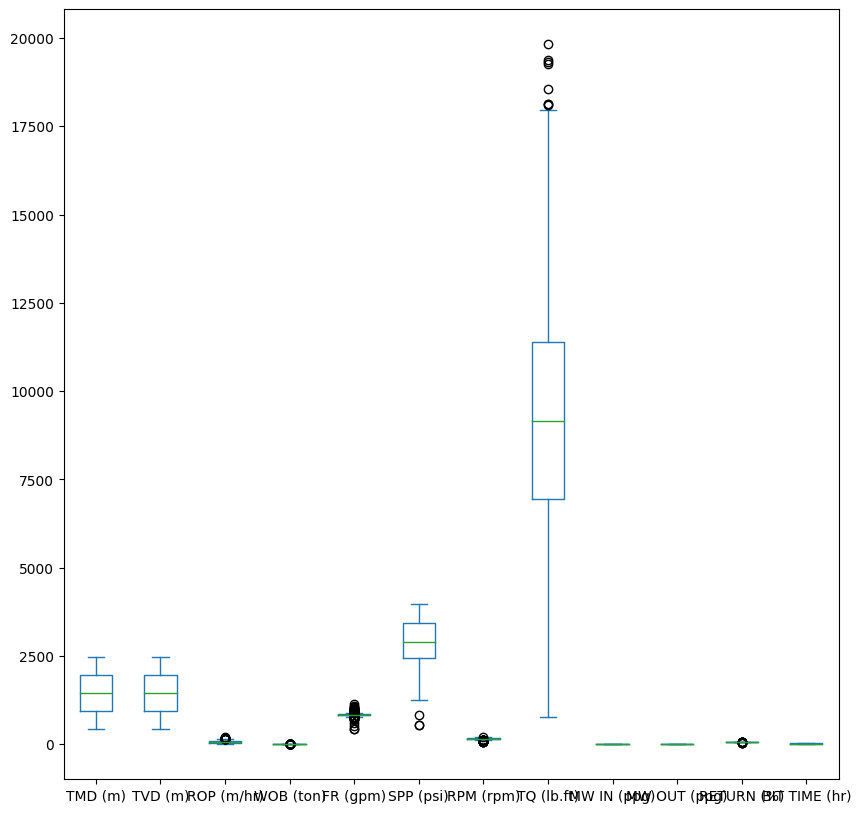

In [79]:
data.plot(kind='box', figsize=(10,10))

2. Display the box-plot of training set of Feature matrix (`X_train`) after Feature Scaling process.

<AxesSubplot: >

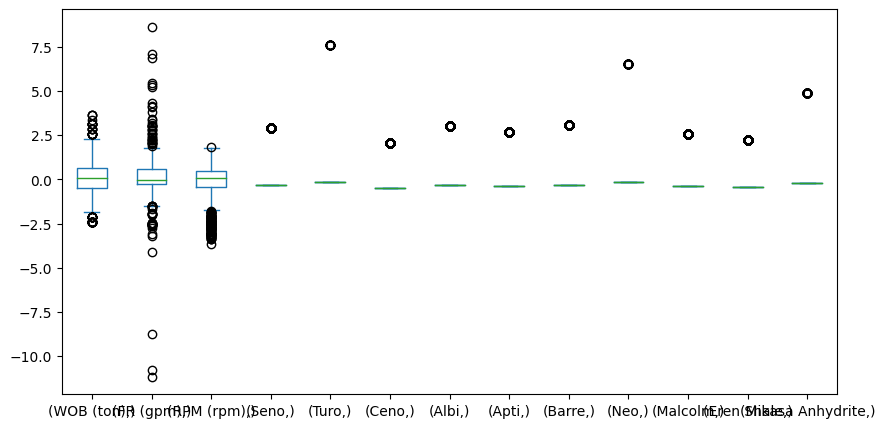

In [80]:
X_train_scaled.plot(kind='box', figsize=(10, 5))

3. Display the box-plot of training set of Feature matrix (`X_test`) after Feature Scaling process.

<AxesSubplot: >

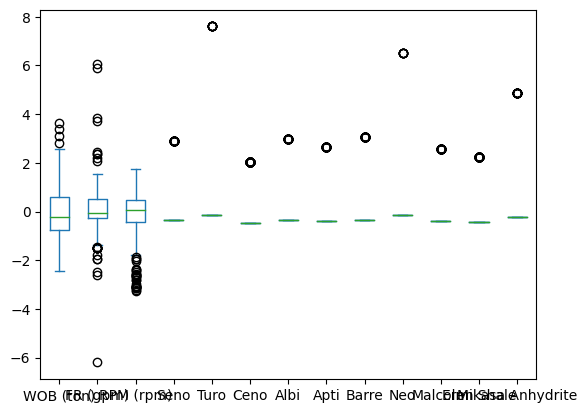

In [81]:
X_test_scaled.plot(kind='box')

## Training the Multiple Linear Regression Model

Training the model can be performed in three simple step:
*   Import `LinearRegression` class from `linear_model` modul of `sklearn`
*   Create the model as an instance of `LinearRegression` class. Example name: `regressor`
* Train the model using `fit` method on the training set (`X_train_scaled` and `y_train`). **Remember!** Use the dataset after feature scaling step for feature matrix.

### Linear Model

In [119]:
from sklearn.linear_model import LinearRegression

# Data UP-5
# create model named regressor
LM = LinearRegression()
# train the model 
LM.fit(X_train_scaled, y_train)

# Data UP-5
# create model named regressor
LM2 = LinearRegression()
# train the model
LM2.fit(X2_train_scaled, y2_train)

LinearRegression()

### Decision Tree

In [120]:
from sklearn.tree import DecisionTreeRegressor

# Data UP-5
# creat model named regressor
DT = DecisionTreeRegressor(random_state=0)
# train the model Data UP-5
DT.fit(X_train_scaled, y_train)

# Data UP-6
# creat model named regressor
DT2 = DecisionTreeRegressor(random_state=0)
# train the model Data UP-6
DT2.fit(X2_train_scaled, y2_train)

DecisionTreeRegressor(random_state=0)

### Random Forest

In [121]:
from sklearn.ensemble import RandomForestRegressor

# Data UP-5
# creat model named regressor
RF = RandomForestRegressor(n_estimators=100, random_state=0)
# train the model Data UP-5
RF.fit(X_train_scaled, y_train)

# Data UP-6
# creat model named regressor
RF2 = RandomForestRegressor(n_estimators=100, random_state=0)
# train the model Data UP-6
RF2.fit(X2_train_scaled, y2_train)

RandomForestRegressor(random_state=0)

### Model Evaluation on Training Set

#### Linear Model

In [122]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# model evaluation Data UP-5
y_pred_train_LM = LM.predict(X_train_scaled)
r2_lm_train = r2_score(y_train, y_pred_train_LM)
mse_lm_train = mean_squared_error(y_train, y_pred_train_LM, squared=False)

# model evaluation Data UP-6
y_pred_train_LM2 = LM2.predict(X2_train_scaled)
r2_lm_train2 = r2_score(y2_train, y_pred_train_LM2)
mse_lm_train2 = mean_squared_error(y2_train, y_pred_train_LM2, squared=False)

#### Decision Tree

In [123]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# model evaluation Data UP-5
y_pred_train_DT = DT.predict(X_train_scaled)
r2_dt_train = r2_score(y_train, y_pred_train_DT)
mse_dt_train = mean_squared_error(y_train, y_pred_train_DT, squared=False)

# model evaluation Data UP-6
y_pred_train_DT2 = DT2.predict(X2_train_scaled)
r2_dt_train2 = r2_score(y2_train, y_pred_train_DT2)
mse_dt_train2 = mean_squared_error(y2_train, y_pred_train_DT2, squared=False)

#### Random Forest

In [124]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# model evaluation Data UP-5
y_pred_train_RF = RF.predict(X_train_scaled)
r2_rf_train = r2_score(y_train, y_pred_train_RF)
mse_rf_train = mean_squared_error(y_train, y_pred_train_RF, squared=False)

# model evaluation Data UP-6
y_pred_train_RF2 = RF2.predict(X2_train_scaled)
r2_rf_train2 = r2_score(y2_train, y_pred_train_RF2)
mse_rf_train2 = mean_squared_error(y2_train, y_pred_train_RF2, squared=False)

#### Value Comparison

In [125]:
print('DATA UP-5')
print(r2_lm_train)
print(mse_lm_train)
print('---------------')
print(r2_dt_train)
print(mse_dt_train)
print('---------------')
print(r2_rf_train)
print(mse_rf_train)
print('\n')
print('DATA UP-6')
print(r2_lm_train2)
print(mse_lm_train2)
print('---------------')
print(r2_dt_train2)
print(mse_dt_train2)
print('---------------')
print(r2_rf_train2)
print(mse_rf_train2)

DATA UP-5
0.4735310486230673
23.701591660321768
---------------
0.9987503260641102
1.15475402797634
---------------
0.9543557689359132
6.978853431397814


DATA UP-6
0.6365782064936316
26.16860349999523
---------------
0.9981812369832819
1.8512416836124554
---------------
0.970894534585074
7.405635582649865


### Model Evaluation on Testing Set

#### Linear Model

In [126]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# model evaluation Data UP-5
y_pred_test_LM = LM.predict(X_test_scaled)
r2_lm_test = r2_score(y_test, y_pred_test_LM)
mse_lm_test = mean_squared_error(y_test, y_pred_test_LM, squared=False)

# model evaluation Data UP-6
y_pred_test_LM2 = LM2.predict(X2_test_scaled)
r2_lm_test2 = r2_score(y2_test, y_pred_test_LM2)
mse_lm_test2 = mean_squared_error(y2_test, y_pred_test_LM2, squared=False)

C:\Users\mabdu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\mabdu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#### Decision Tree

In [127]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# model evaluation Data UP-5
y_pred_test_DT = DT.predict(X_test_scaled)
r2_dt_test = r2_score(y_test, y_pred_test_DT)
mse_dt_test = mean_squared_error(y_test, y_pred_test_DT, squared=False)

# model evaluation Data UP-6
y_pred_test_DT2 = DT2.predict(X2_test_scaled)
r2_dt_test2 = r2_score(y2_test, y_pred_test_DT2)
mse_dt_test2 = mean_squared_error(y2_test, y_pred_test_DT2, squared=False)

C:\Users\mabdu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\mabdu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


#### Random Forest

In [128]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# model evaluation Data UP-5
y_pred_test_RF = RF.predict(X_test_scaled)
r2_rf_test = r2_score(y_test, y_pred_test_RF)
mse_rf_test = mean_squared_error(y_test, y_pred_test_RF, squared=False)

# model evaluation Data UP-6
y_pred_test_RF2 = RF2.predict(X2_test_scaled)
r2_rf_test2 = r2_score(y2_test, y_pred_test_RF2)
mse_rf_test2 = mean_squared_error(y2_test, y_pred_test_RF2, squared=False)

C:\Users\mabdu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\mabdu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


#### Comparison Value

In [129]:
print('DATA UP-5')
print(r2_lm_test)
print(mse_lm_test)
print('---------------')
print(r2_dt_test)
print(mse_dt_test)
print('---------------')
print(r2_rf_test)
print(mse_rf_test)
print('\n')
print('DATA UP-6')
print(r2_lm_test2)
print(mse_lm_test2)
print('---------------')
print(r2_dt_test2)
print(mse_dt_test2)
print('---------------')
print(r2_rf_test2)
print(mse_rf_test2)

DATA UP-5
0.39980152470710284
25.16046553397233
---------------
0.4917296886362187
23.15360393113781
---------------
0.6609963239022496
18.909212059957273


DATA UP-6
0.6443448264562468
23.95064795729681
---------------
0.7016816859800669
21.935253607191232
---------------
0.802787789202257
17.834855821194775


## Result Interpretation

### Model Coefficients

Recall the mathematical formula for Multiple Linear Regression:
$$ y_{\text{predict}}=a_0+a_1 * x_{\text{TVD}}+a_2 * x_{\text{WOB}}+a_3 * x_{\text{FR}}+a_4 * x_{\text{RPM}}$$

Determine intercept coefficient $a_0$ using `intercept_` method

In [130]:
LM.intercept_ # Data UP-5

72.62815373940794

In [131]:
LM2.intercept_ # Data UP-6

83.34547263681593

List the coefficients for each independent variables (i.e. $a_1$, $a_2$, $a_3$, $a_4$) using `coef_` method

In [132]:
LM.coef_ # Data UP-5

array([-7.78708598e+00,  3.36117933e+00,  1.10213731e+01,  4.49899735e+13,
        1.88737697e+13,  5.76239432e+13,  4.38338763e+13,  4.80936889e+13,
        4.31165916e+13,  2.19192251e+13,  4.93783254e+13,  5.44471874e+13,
        2.88415663e+13])

In [133]:
LM2.coef_ # Data UP-6

array([-10.01242369,   3.27482461,  14.27893281,  10.48220062,
        -2.94939647,  16.31713287,  -0.70804425,  -8.32427733,
        -0.48614017,  -7.46538042,  -6.08290936,  -0.78242303,
        -5.13086909,  -1.81402369,  -3.63581015])

### Prediction Using the Model

Predict whether or not the ROP result is correct using one of the original data.

In [98]:
X.columns

Index(['WOB (ton)', 'FR (gpm)', 'RPM (rpm)', 'Seno', 'Turo', 'Ceno', 'Albi',
       'Apti', 'Barre', 'Neo', 'Malcolm', 'Eren Shale', 'Mikasa Anhydrite'],
      dtype='object')

In [134]:
# for Data UP-5

new_data = X[['WOB (ton)', 'FR (gpm)', 'RPM (rpm)', 'Seno', 'Turo', 'Ceno', 'Albi',
            'Apti', 'Barre', 'Neo', 'Malcolm', 'Eren Shale', 'Mikasa Anhydrite']].tail(1)
prediction = RF.predict(new_data)
print('The model predict :', prediction)
print('Actual value :', data[['ROP (m/hr)']].tail(1).values[0][0])

The model predict : [25.323]
Actual value : 25.6


C:\Users\mabdu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


**Berdasarkan Prediction Using the Model ini, maka dipilihlah model Random Forest untuk Data UP-6**

In [135]:
X2.columns

Index(['WOB (ton)', 'FR (gpm)', 'RPM (rpm)', 'Mio', 'Seno Carbonate',
       'Seno Anhydratic', 'Seno Salt', 'Ceno', 'Albi', 'Apti', 'Barre', 'Neo',
       'Malcolm', 'Eren Shale', 'Mikasa Ahydrite'],
      dtype='object')

In [142]:
# for Data UP-6

new_data2 = X2[['WOB (ton)', 'FR (gpm)', 'RPM (rpm)', 'Mio',
       'Seno Carbonate', 'Seno Anhydratic', 'Seno Salt', 'Ceno', 'Albi',
       'Apti', 'Barre', 'Neo', 'Malcolm', 'Eren Shale', 'Mikasa Ahydrite']].tail(1)
prediction2 = DT2.predict(new_data2)
print('The model predict :', prediction2)
print('Actual value :', data2[['ROP (m/hr)']].tail(1).values[0][0])

The model predict : [11.3]
Actual value : 15.3


C:\Users\mabdu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


**Berdasarkan Prediction Using the Model ini, maka dipilihlah model Decision Tree untuk Data UP-6**

# **Pemilihan & Evaluasi Model Prediksi ROP**

### Cross Validation

#### Data UP-5

In [147]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=RF, X=X_train_scaled, y=y_train, cv=10)
scores

array([0.70070973, 0.60004571, 0.63082217, 0.63647105, 0.78922312,
       0.64107617, 0.70490733, 0.67804726, 0.70012382, 0.6250078 ])

In [150]:
mean1 = np.mean(scores)
mean1

0.670643415590882

#### Data UP-6

In [154]:
from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(estimator=DT2, X=X2_train_scaled, y=y2_train, cv=10)
scores2

array([0.76131084, 0.69711851, 0.69971733, 0.58995476, 0.50459423,
       0.63311841, 0.67322443, 0.69128829, 0.66647088, 0.58278194])

In [155]:
mean2 = np.mean(scores)
mean2

0.6499579639440223

## Learning Curve

#### Data UP-5

In [156]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge

In [157]:
train_sizes=np.linspace(0.05,1,9)
train_sizes_abs, train_scores, test_scores = learning_curve(Ridge(), 
                                                            X_train_scaled, 
                                                            y_train, 
                                                            train_sizes=np.linspace(0.05,1,9),
                                                            cv=10)

In [158]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

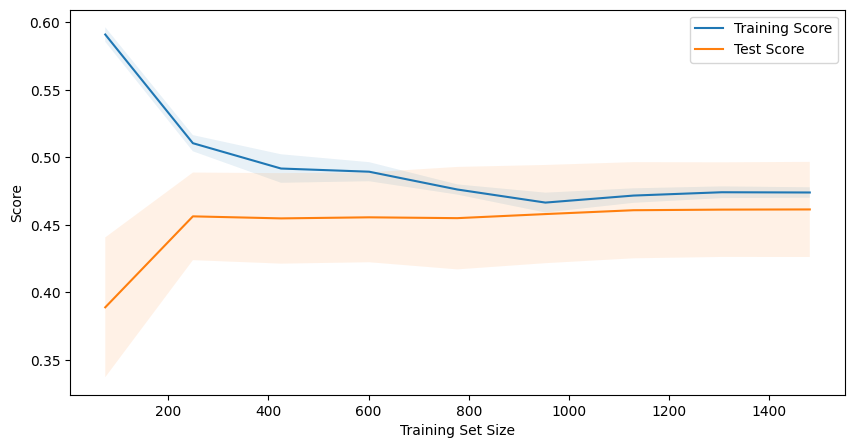

In [159]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.plot(train_sizes_abs, train_scores_mean, label='Training Score')
axes.plot(train_sizes_abs, test_scores_mean, label='Test Score')

axes.fill_between(train_sizes_abs,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  alpha=0.1)

axes.fill_between(train_sizes_abs,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha=0.1)

axes.set_xlabel('Training Set Size')
axes.set_ylabel('Score')
axes.legend()

#### Data UP-6

In [160]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge

In [162]:
train_sizes=np.linspace(0.05,1,9)
train_sizes_abs2, train_scores2, test_scores2 = learning_curve(Ridge(), 
                                                            X2_train_scaled, 
                                                            y2_train, 
                                                            train_sizes=np.linspace(0.05,1,9),
                                                            cv=10)

In [163]:
train_scores_mean2 = np.mean(train_scores2, axis=1)
test_scores_mean2 = np.mean(test_scores2, axis=1)
train_scores_std2 = np.std(train_scores2, axis=1)
test_scores_std2 = np.std(test_scores2, axis=1)

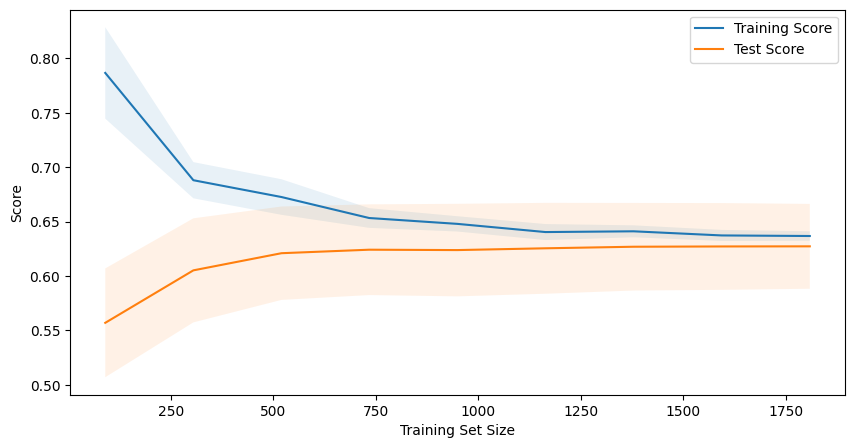

In [164]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.plot(train_sizes_abs2, train_scores_mean2, label='Training Score')
axes.plot(train_sizes_abs2, test_scores_mean2, label='Test Score')

axes.fill_between(train_sizes_abs2,
                  train_scores_mean2 - train_scores_std2,
                  train_scores_mean2 + train_scores_std2,
                  alpha=0.1)

axes.fill_between(train_sizes_abs2,
                  test_scores_mean2 - test_scores_std2,
                  test_scores_mean2 + test_scores_std2,
                  alpha=0.1)

axes.set_xlabel('Training Set Size')
axes.set_ylabel('Score')
axes.legend()

## Validation Curve

#### Data UP-5

In [165]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

In [166]:
param_range = np.logspace(-7,5,13)
param_range

array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

In [167]:
train_scores, test_scores = validation_curve(estimator=Ridge(),
                                             X=X_train_scaled,
                                             y=y_train,
                                             param_name='alpha',
                                             param_range=param_range,
                                             cv=10)

In [168]:
pd.DataFrame(train_scores)

,0,1,2,3,4,5,6,7,8,9
0,0.470908,0.474180,0.480614,0.474000,0.471575,0.474303,0.479383,0.466638,0.472637,0.476226
1,0.470908,0.474180,0.480614,0.474000,0.471575,0.474303,0.479383,0.466638,0.472637,0.476226
2,0.470908,0.474180,0.480614,0.474000,0.471575,0.474303,0.479383,0.466638,0.472637,0.476226
3,0.470908,0.474180,0.480614,0.474000,0.471575,0.474303,0.479383,0.466638,0.472637,0.476226
4,0.470908,0.474180,0.480614,0.474000,0.471575,0.474303,0.479383,0.466638,0.472637,0.476226
5,0.470908,0.474180,0.480614,0.474000,0.471575,0.474303,0.479383,0.466638,0.472637,0.476226
6,0.470908,0.474180,0.480614,0.474000,0.471575,0.474303,0.479383,0.466638,0.472637,0.476226
7,0.470908,0.474179,0.480614,0.474000,0.471574,0.474302,0.479382,0.466637,0.472636,0.476225
8,0.470849,0.474116,0.480556,0.473936,0.471511,0.474246,0.479321,0.466577,0.472575,0.476162
9,0.466979,0.469977,0.476713,0.469823,0.467401,0.470566,0.475379,0.462633,0.468562,0.472064


In [169]:
pd.DataFrame(test_scores)

,0,1,2,3,4,5,6,7,8,9
0,0.495386,0.462105,0.415603,0.458493,0.485577,0.438214,0.412240,0.530338,0.478788,0.438002
1,0.495386,0.462105,0.415603,0.458493,0.485577,0.438214,0.412240,0.530338,0.478788,0.438002
2,0.495386,0.462105,0.415603,0.458493,0.485577,0.438214,0.412240,0.530338,0.478788,0.438002
3,0.495386,0.462105,0.415603,0.458493,0.485578,0.438214,0.412240,0.530338,0.478788,0.438002
4,0.495386,0.462105,0.415603,0.458493,0.485578,0.438214,0.412240,0.530338,0.478788,0.438002
5,0.495386,0.462107,0.415602,0.458494,0.485578,0.438213,0.412240,0.530337,0.478788,0.438003
6,0.495382,0.462122,0.415594,0.458502,0.485579,0.438201,0.412239,0.530334,0.478792,0.438009
7,0.495341,0.462276,0.415517,0.458579,0.485590,0.438083,0.412235,0.530298,0.478830,0.438075
8,0.494893,0.463717,0.414729,0.459258,0.485641,0.436894,0.412139,0.529891,0.479141,0.438647
9,0.488111,0.471554,0.406378,0.460150,0.482132,0.425194,0.408019,0.522810,0.477667,0.439035


In [170]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

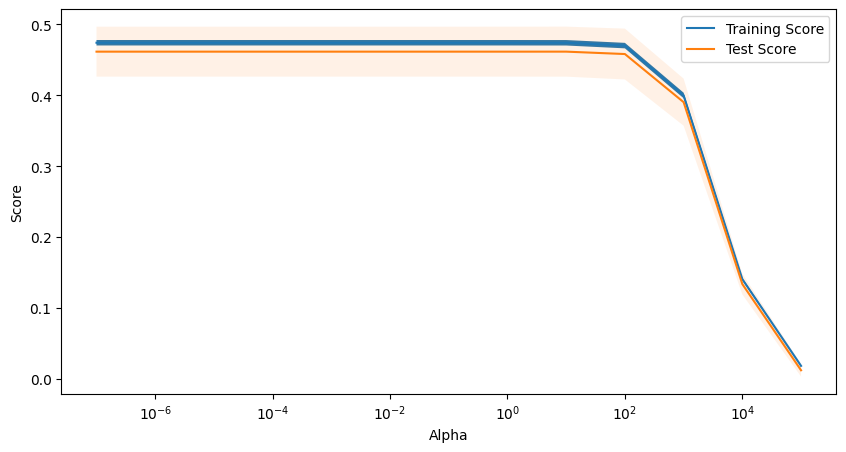

In [171]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.semilogx(param_range, train_scores_mean, label='Training Score')
axes.semilogx(param_range, test_scores_mean, label='Test Score')

axes.fill_between(param_range,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std)

axes.fill_between(param_range,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha=0.1)

axes.set_xlabel('Alpha')
axes.set_ylabel('Score')
axes.legend()

#### Data UP-6

In [172]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

In [173]:
param_range = np.logspace(-7,5,13)
param_range

array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

In [174]:
train_scores2, test_scores2 = validation_curve(estimator=Ridge(),
                                             X=X2_train_scaled,
                                             y=y2_train,
                                             param_name='alpha',
                                             param_range=param_range,
                                             cv=10)

In [176]:
pd.DataFrame(train_scores2)

,0,1,2,3,4,5,6,7,8,9
0,0.626296,0.636788,0.637559,0.640822,0.640256,0.634931,0.641487,0.640170,0.632910,0.637146
1,0.626296,0.636788,0.637559,0.640822,0.640256,0.634931,0.641487,0.640170,0.632910,0.637146
2,0.626296,0.636788,0.637559,0.640822,0.640256,0.634931,0.641487,0.640170,0.632910,0.637146
3,0.626296,0.636788,0.637559,0.640822,0.640256,0.634931,0.641487,0.640170,0.632910,0.637146
4,0.626296,0.636788,0.637559,0.640822,0.640256,0.634931,0.641487,0.640170,0.632910,0.637146
5,0.626296,0.636788,0.637559,0.640822,0.640256,0.634931,0.641487,0.640170,0.632910,0.637146
6,0.626296,0.636788,0.637559,0.640822,0.640256,0.634931,0.641487,0.640170,0.632910,0.637146
7,0.626295,0.636788,0.637558,0.640822,0.640256,0.634931,0.641487,0.640170,0.632910,0.637146
8,0.626280,0.636772,0.637544,0.640805,0.640241,0.634914,0.641472,0.640155,0.632894,0.637130
9,0.625002,0.635458,0.636319,0.639471,0.639031,0.633597,0.640255,0.638873,0.631608,0.635862


In [177]:
pd.DataFrame(test_scores2)

,0,1,2,3,4,5,6,7,8,9
0,0.711484,0.624341,0.624621,0.573087,0.600793,0.645928,0.585415,0.608324,0.672195,0.627180
1,0.711484,0.624341,0.624621,0.573087,0.600793,0.645928,0.585415,0.608324,0.672195,0.627180
2,0.711484,0.624341,0.624621,0.573087,0.600793,0.645928,0.585415,0.608324,0.672195,0.627180
3,0.711484,0.624341,0.624621,0.573087,0.600793,0.645928,0.585415,0.608324,0.672195,0.627180
4,0.711484,0.624341,0.624621,0.573087,0.600792,0.645928,0.585415,0.608324,0.672195,0.627180
5,0.711484,0.624342,0.624621,0.573088,0.600792,0.645928,0.585415,0.608324,0.672195,0.627180
6,0.711479,0.624343,0.624621,0.573097,0.600789,0.645927,0.585416,0.608323,0.672200,0.627184
7,0.711430,0.624355,0.624628,0.573181,0.600759,0.645921,0.585423,0.608307,0.672247,0.627220
8,0.710929,0.624453,0.624688,0.573982,0.600448,0.645838,0.585486,0.608144,0.672695,0.627564
9,0.705064,0.623710,0.624456,0.579050,0.596888,0.643567,0.585412,0.605732,0.675216,0.629545


In [179]:
train_scores_mean2 = np.mean(train_scores2, axis=1)
test_scores_mean2 = np.mean(test_scores2, axis=1)
train_scores_std2 = np.std(train_scores2, axis=1)
test_scores_std2 = np.std(test_scores2, axis=1)

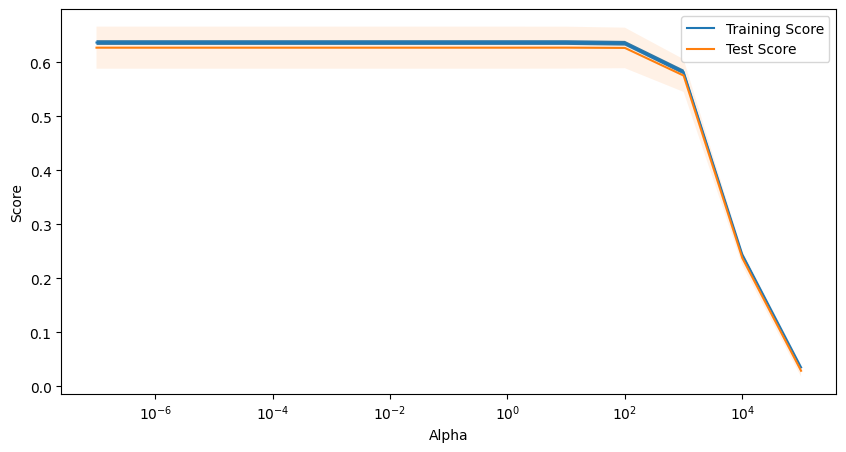

In [180]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.semilogx(param_range, train_scores_mean2, label='Training Score')
axes.semilogx(param_range, test_scores_mean2, label='Test Score')

axes.fill_between(param_range,
                  train_scores_mean2 - train_scores_std2,
                  train_scores_mean2 + train_scores_std2)

axes.fill_between(param_range,
                  test_scores_mean2 - test_scores_std2,
                  test_scores_mean2 + test_scores_std2,
                  alpha=0.1)

axes.set_xlabel('Alpha')
axes.set_ylabel('Score')
axes.legend()

## Hyperparameter Tuning

In [193]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# define searching domain (with grid search)
param_grid = {'solver':['auto', 'svd', 'cholesky'],
              'alpha': np.logspace(-7,5,5)}

# create search command
search1 = GridSearchCV(estimator=Ridge(),
                      param_grid=param_grid,
                      scoring='r2',
                      cv=5)

search2 = GridSearchCV(estimator=Ridge(),
                      param_grid=param_grid,
                      scoring='r2',
                      cv=5)

#### Data UP-5

In [194]:
# command search step by training for Data UP-5
evaluasi1 = search1.fit(X_train_scaled, y_train)
evaluasi1

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-07, 1.e-04, 1.e-01, 1.e+02, 1.e+05]),
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='r2')

In [195]:
pd.DataFrame(evaluasi1.cv_results_).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
mean_fit_time,0.002863,0.008057,0.004173,0.006325,0.008326,0.003625,0.003815,0.003758,0.0,0.003205,0.0042,0.001462,0.002704,0.004818,0.002048
std_fit_time,0.003584,0.000072,0.003599,0.002089,0.001235,0.00097,0.001582,0.000574,0.0,0.001229,0.003347,0.001343,0.00075,0.002337,0.003331
mean_score_time,0.003288,0.003187,0.001913,0.002923,0.001911,0.002353,0.001611,0.001842,0.005332,0.000696,0.001336,0.003044,0.001859,0.001223,0.000932
std_score_time,0.004027,0.003903,0.002343,0.001587,0.001067,0.000687,0.000456,0.000387,0.00689,0.000865,0.001445,0.003023,0.000282,0.001119,0.001863
param_alpha,0.0,0.0,0.0,0.0001,0.0001,0.0001,0.1,0.1,0.1,100.0,100.0,100.0,100000.0,100000.0,100000.0
param_solver,auto,svd,cholesky,auto,svd,cholesky,auto,svd,cholesky,auto,svd,cholesky,auto,svd,cholesky
params,"{'alpha': 1e-07, 'solver': 'auto'}","{'alpha': 1e-07, 'solver': 'svd'}","{'alpha': 1e-07, 'solver': 'cholesky'}","{'alpha': 0.0001, 'solver': 'auto'}","{'alpha': 0.0001, 'solver': 'svd'}","{'alpha': 0.0001, 'solver': 'cholesky'}","{'alpha': 0.1, 'solver': 'auto'}","{'alpha': 0.1, 'solver': 'svd'}","{'alpha': 0.1, 'solver': 'cholesky'}","{'alpha': 100.0, 'solver': 'auto'}","{'alpha': 100.0, 'solver': 'svd'}","{'alpha': 100.0, 'solver': 'cholesky'}","{'alpha': 100000.0, 'solver': 'auto'}","{'alpha': 100000.0, 'solver': 'svd'}","{'alpha': 100000.0, 'solver': 'cholesky'}"
split0_test_score,0.478064,0.478064,0.478064,0.478064,0.478064,0.478064,0.478072,0.478072,0.478072,0.479576,0.479576,0.479576,0.017126,0.017126,0.017126
split1_test_score,0.441829,0.441829,0.441829,0.441829,0.441829,0.441829,0.441827,0.441827,0.441827,0.436376,0.436376,0.436376,0.012546,0.012546,0.012546
split2_test_score,0.45582,0.45582,0.45582,0.45582,0.45582,0.45582,0.455815,0.455815,0.455815,0.447405,0.447405,0.447405,0.011498,0.011498,0.011498


#### Data UP-6

In [196]:
# command search step by training for Data UP-6
evaluasi2 = search2.fit(X2_train_scaled, y2_train)
evaluasi2

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-07, 1.e-04, 1.e-01, 1.e+02, 1.e+05]),
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='r2')

In [197]:
pd.DataFrame(evaluasi2.cv_results_).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
mean_fit_time,0.005318,0.006522,0.002785,0.004045,0.003585,0.001553,0.004297,0.003107,0.004361,0.002021,0.003111,0.002234,0.003873,0.003352,0.003142
std_fit_time,0.000906,0.000925,0.001457,0.003649,0.000735,0.000797,0.000401,0.006214,0.006148,0.004041,0.006223,0.004468,0.000528,0.006151,0.006285
mean_score_time,0.00228,0.00182,0.001284,0.001983,0.001446,0.000588,0.001393,0.0,0.0,0.003146,0.0,0.00334,0.001402,0.0,0.003125
std_score_time,0.001044,0.001151,0.000797,0.001079,0.00078,0.00048,0.001018,0.0,0.0,0.006291,0.0,0.006155,0.001005,0.0,0.006251
param_alpha,0.0,0.0,0.0,0.0001,0.0001,0.0001,0.1,0.1,0.1,100.0,100.0,100.0,100000.0,100000.0,100000.0
param_solver,auto,svd,cholesky,auto,svd,cholesky,auto,svd,cholesky,auto,svd,cholesky,auto,svd,cholesky
params,"{'alpha': 1e-07, 'solver': 'auto'}","{'alpha': 1e-07, 'solver': 'svd'}","{'alpha': 1e-07, 'solver': 'cholesky'}","{'alpha': 0.0001, 'solver': 'auto'}","{'alpha': 0.0001, 'solver': 'svd'}","{'alpha': 0.0001, 'solver': 'cholesky'}","{'alpha': 0.1, 'solver': 'auto'}","{'alpha': 0.1, 'solver': 'svd'}","{'alpha': 0.1, 'solver': 'cholesky'}","{'alpha': 100.0, 'solver': 'auto'}","{'alpha': 100.0, 'solver': 'svd'}","{'alpha': 100.0, 'solver': 'cholesky'}","{'alpha': 100000.0, 'solver': 'auto'}","{'alpha': 100000.0, 'solver': 'svd'}","{'alpha': 100000.0, 'solver': 'cholesky'}"
split0_test_score,0.669205,0.669205,0.669205,0.669205,0.669205,0.669205,0.669202,0.669202,0.669202,0.664829,0.664829,0.664829,0.023508,0.023508,0.023508
split1_test_score,0.605425,0.605425,0.605425,0.605425,0.605425,0.605425,0.60543,0.60543,0.60543,0.608063,0.608063,0.608063,0.025365,0.025365,0.025365
split2_test_score,0.627509,0.627509,0.627509,0.627509,0.627509,0.627509,0.627506,0.627506,0.627506,0.623271,0.623271,0.623271,0.02869,0.02869,0.02869


In [198]:
# after finding the best recipe for our model, we'll use the recipe to build the model
model_optimized_1 = evaluasi1.best_estimator_
model_optimized_2 = evaluasi2.best_estimator_

In [199]:
# train the optimized model (why? to predict later)
model_optimized_1.fit(X_train_scaled, y_train)
model_optimized_2.fit(X2_train_scaled, y2_train)

Ridge(alpha=0.1, solver='svd')

In [200]:
# predict using the optimized model
y_pred_test = model_optimized_1.predict(X_test_scaled)
y2_pred_test = model_optimized_2.predict(X2_test_scaled)

C:\Users\mabdu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\mabdu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [201]:
# see blind set score
from sklearn.metrics import r2_score

In [202]:
# Data UP-5
r2_lm_optimized = r2_score(y_test, y_pred_test_LM)
r2_dt_optimized = r2_score(y_test, y_pred_test_DT)
r2_rf_optimized = r2_score(y_test, y_pred_test_RF)

# Data UP-6
r2_lm_optimized2 = r2_score(y2_test, y_pred_test_LM2)
r2_dt_optimized2 = r2_score(y2_test, y_pred_test_DT2)
r2_rf_optimized2 = r2_score(y2_test, y_pred_test_RF2)

In [203]:
print('DATA UP-5')
print(r2_lm_optimized)
print('---------------')
print(r2_dt_optimized)
print('---------------')
print(r2_rf_optimized)
print('\n')
print('DATA UP-6')
print(r2_lm_optimized2)
print('---------------')
print(r2_dt_optimized2)
print('---------------')
print(r2_rf_optimized2)

DATA UP-5
0.39980152470710284
---------------
0.4917296886362187
---------------
0.6609963239022496


DATA UP-6
0.6443448264562468
---------------
0.7016816859800669
---------------
0.802787789202257


In [238]:
# Create Table for R2 Score Values Above

combine = {'R2 Score Data UP-5':[r2_lm_optimized, r2_dt_optimized, r2_rf_optimized], 'R2 Score Data UP-6':[r2_lm_optimized2, r2_dt_optimized2, r2_rf_optimized2]}
table_optimized = pd.DataFrame(combine)
table_optimized
table_optimized.rename(index= {0: "Linear Model", 1: "Decision Tree",  2: "Random Forest"})

,R2 Score Data UP-5,R2 Score Data UP-6
Linear Model,0.399802,0.644345
Decision Tree,0.491730,0.701682
Random Forest,0.660996,0.802788


In [253]:
# Data UP-5
mse_lm_optimized = mean_squared_error(y_test, y_pred_test_LM,squared=False)
mse_dt_optimized = mean_squared_error(y_test, y_pred_test_DT,squared=False)
mse_rf_optimized = mean_squared_error(y_test, y_pred_test_RF,squared=False)

# Data UP-6
mse_lm_optimized2 = mean_squared_error(y2_test, y_pred_test_LM2,squared=False)
mse_dt_optimized2 = mean_squared_error(y2_test, y_pred_test_DT2,squared=False)
mse_rf_optimized2 = mean_squared_error(y2_test, y_pred_test_RF2,squared=False)

In [254]:
print('DATA UP-5')
print(mse_lm_optimized)
print('---------------')
print(mse_dt_optimized)
print('---------------')
print(mse_rf_optimized)
print('\n')
print('DATA UP-6')
print(mse_lm_optimized2)
print('---------------')
print(mse_dt_optimized2)
print('---------------')
print(mse_rf_optimized2)

DATA UP-5
25.16046553397233
---------------
23.15360393113781
---------------
18.909212059957273


DATA UP-6
23.95064795729681
---------------
21.935253607191232
---------------
17.834855821194775


In [255]:
# Create Table for MSE Values Above

combine2 = {'MSE Data UP-5':[mse_lm_optimized, mse_dt_optimized, mse_rf_optimized], 'MSE Data UP-6':[mse_lm_optimized2, mse_dt_optimized2, mse_rf_optimized2]}
table_optimized2 = pd.DataFrame(combine2)
table_optimized2
table_optimized2.rename(index= {0: "Linear Model", 1: "Decision Tree",  2: "Random Forest"})

,MSE Data UP-5,MSE Data UP-6
Linear Model,25.160466,23.950648
Decision Tree,23.153604,21.935254
Random Forest,18.909212,17.834856


# **Investigasi Model dan Penentuan Parameter Utama**

## Permutation Feature Importance

In [207]:
from sklearn.inspection import permutation_importance

In [208]:
X_train_scaled

,WOB (ton),FR (gpm),RPM (rpm),Seno,Turo,Ceno,Albi,Apti,Barre,Neo,Malcolm,Eren Shale,Mikasa Anhydrite
0,-2.145747,0.992101,-0.231971,-0.344915,-0.13155,-0.489344,2.995957,-0.376125,-0.326996,-0.153727,-0.389685,-0.447866,-0.20599
1,-0.764912,-0.333419,-2.431223,-0.344915,-0.13155,-0.489344,-0.333783,-0.376125,-0.326996,-0.153727,-0.389685,2.232813,-0.20599
2,-1.869580,-0.110619,-0.612611,-0.344915,-0.13155,-0.489344,-0.333783,-0.376125,-0.326996,-0.153727,-0.389685,2.232813,-0.20599
3,0.339756,-0.042933,0.740775,-0.344915,-0.13155,-0.489344,-0.333783,-0.376125,3.058137,-0.153727,-0.389685,-0.447866,-0.20599
4,0.339756,0.574703,0.656189,-0.344915,-0.13155,-0.489344,-0.333783,-0.376125,-0.326996,-0.153727,2.566175,-0.447866,-0.20599
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,-1.041079,-0.020371,-0.105091,-0.344915,-0.13155,2.043551,-0.333783,-0.376125,-0.326996,-0.153727,-0.389685,-0.447866,-0.20599
1642,-1.593413,0.041675,-0.189678,-0.344915,-0.13155,2.043551,-0.333783,-0.376125,-0.326996,-0.153727,-0.389685,-0.447866,-0.20599
1643,-0.212578,-1.227440,-0.231971,-0.344915,-0.13155,2.043551,-0.333783,-0.376125,-0.326996,-0.153727,-0.389685,-0.447866,-0.20599
1644,0.615923,0.112181,-0.189678,-0.344915,-0.13155,-0.489344,-0.333783,-0.376125,-0.326996,-0.153727,-0.389685,2.232813,-0.20599


In [209]:
X2_train_scaled

,WOB (ton),FR (gpm),RPM (rpm),Mio,Seno Carbonate,Seno Anhydratic,Seno Salt,Ceno,Albi,Apti,Barre,Neo,Malcolm,Eren Shale,Mikasa Ahydrite
0,-0.460287,0.638740,0.635982,-0.319333,-0.116686,2.306676,-0.355036,-0.329636,-0.300036,-0.142494,-0.295083,-0.346088,-0.332411,-0.287038,-0.254202
1,-1.592347,0.478424,-0.064501,3.131525,-0.116686,-0.433524,-0.355036,-0.329636,-0.300036,-0.142494,-0.295083,-0.346088,-0.332411,-0.287038,-0.254202
2,-0.743302,0.060303,0.752729,-0.319333,-0.116686,-0.433524,2.816617,-0.329636,-0.300036,-0.142494,-0.295083,-0.346088,-0.332411,-0.287038,-0.254202
3,-0.743302,0.367214,0.577608,3.131525,-0.116686,-0.433524,-0.355036,-0.329636,-0.300036,-0.142494,-0.295083,-0.346088,-0.332411,-0.287038,-0.254202
4,-0.743302,-2.818163,-1.669775,-0.319333,-0.116686,-0.433524,-0.355036,-0.329636,-0.300036,-0.142494,-0.295083,-0.346088,-0.332411,3.483856,-0.254202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,0.954789,0.734063,0.781916,-0.319333,-0.116686,-0.433524,2.816617,-0.329636,-0.300036,-0.142494,-0.295083,-0.346088,-0.332411,-0.287038,-0.254202
2006,0.388759,-0.219167,0.256553,-0.319333,-0.116686,-0.433524,2.816617,-0.329636,-0.300036,-0.142494,-0.295083,-0.346088,-0.332411,-0.287038,-0.254202
2007,-0.460287,0.424985,0.811103,3.131525,-0.116686,-0.433524,-0.355036,-0.329636,-0.300036,-0.142494,-0.295083,-0.346088,-0.332411,-0.287038,-0.254202
2008,0.105743,-2.771946,-1.436281,-0.319333,-0.116686,-0.433524,-0.355036,-0.329636,-0.300036,-0.142494,-0.295083,-0.346088,-0.332411,3.483856,-0.254202


#### Data UP-5

In [216]:
r1 = permutation_importance(model_optimized_1,
                            X_train_scaled,
                            y_train,
                            n_repeats=10,
                            random_state=0)

In [217]:
r1.importances_mean

array([0.11462753, 0.0213957 , 0.22713079, 0.253264  , 0.01715087,
       0.00415992, 0.03342697, 0.22759699, 0.13809804, 0.03244057,
       0.0195012 , 0.00222795, 0.0028497 ])

In [218]:
r1.importances_std

array([0.0063632 , 0.00394174, 0.0147378 , 0.00963453, 0.00337699,
       0.00164633, 0.00638094, 0.00973614, 0.01135243, 0.00312012,
       0.00281759, 0.000888  , 0.00123585])

In [222]:
RF.feature_importances_

array([0.20982765, 0.23729574, 0.29505008, 0.1465782 , 0.01606017,
       0.02147851, 0.0135673 , 0.004497  , 0.00930013, 0.00487149,
       0.01211042, 0.01471096, 0.01465234])

Text(0.5, 0, 'Random Forest Feature Importance')

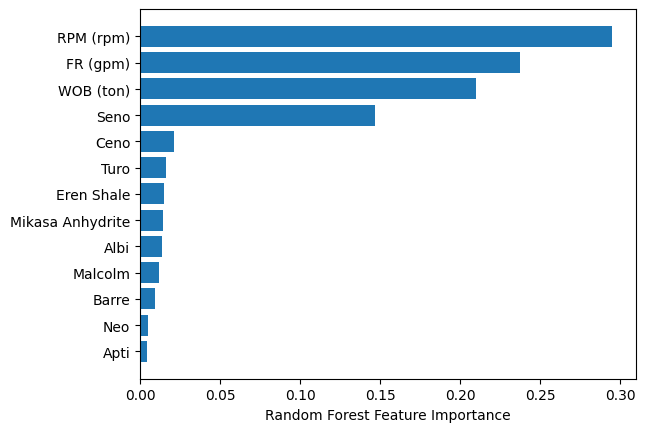

In [224]:
sorted_idx = RF.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importance')

#### Data UP-6

In [219]:
r2 = permutation_importance(model_optimized_2,
                            X2_train_scaled,
                            y2_train,
                            n_repeats=10,
                            random_state=0)

In [220]:
r2.importances_mean

array([1.06033830e-01, 1.14551085e-02, 2.16190640e-01, 1.18212149e-01,
       8.04538532e-03, 2.82494069e-01, 6.01156099e-04, 7.21754748e-02,
       2.68770602e-04, 5.90248500e-02, 3.83180635e-02, 5.31808322e-04,
       2.81982717e-02, 4.14240192e-03, 1.44818024e-02])

In [221]:
r2.importances_std

array([0.00895074, 0.00190907, 0.01252224, 0.00794715, 0.00101562,
       0.00907866, 0.00033049, 0.00401273, 0.00032014, 0.00373228,
       0.00353274, 0.00022856, 0.00167339, 0.00118355, 0.00181193])

In [243]:
RF2.feature_importances_

array([0.09575502, 0.22296004, 0.1586989 , 0.19789286, 0.00078972,
       0.27681736, 0.02008559, 0.00135487, 0.0018747 , 0.00880187,
       0.00149903, 0.0072803 , 0.00417607, 0.00077049, 0.00124317])

Text(0.5, 0, 'Random Forest Feature Importance')

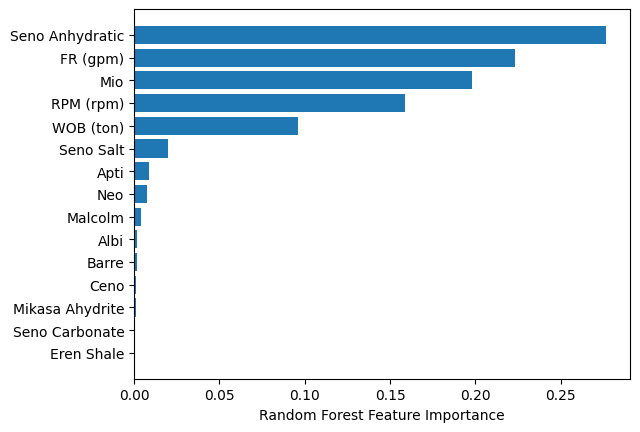

In [244]:
sorted_idx = RF2.feature_importances_.argsort()
plt.barh(X2.columns[sorted_idx], RF2.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importance')